In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Length: 1296675, dtype: bool

In [10]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [14]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [15]:
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
df_test.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
train_data = df[['gender', "category", "amt", "city", "job", "is_fraud"]]
test_data = df_test[['gender', "category", "amt", "city", "job", "is_fraud"]]

In [22]:
train_data.loc[:, 'category'] = le.fit_transform(train_data["category"])
train_data.loc[:, 'city'] = le.fit_transform(train_data["city"])
train_data.loc[:, 'job'] = le.fit_transform(train_data["job"])
train_data.loc[:, 'gender'] = train_data["gender"].map({'M': 0, 'F': 1})

In [23]:
test_data.loc[:, 'category'] = le.fit_transform(test_data["category"])
test_data.loc[:, 'city'] = le.fit_transform(test_data["city"])
test_data.loc[:, 'job'] = le.fit_transform(test_data["job"])
test_data.loc[:, 'gender'] = test_data["gender"].map({'M': 0, 'F': 1})

In [24]:
train_data.head()

,gender,category,amt,city,job,is_fraud
0,1,8,4.97,526,370,0
1,1,4,107.23,612,428,0
2,0,0,220.11,468,307,0
3,0,2,45.00,84,328,0
4,0,9,41.96,216,116,0


In [25]:
test_data.head()

,gender,category,amt,city,job,is_fraud
0,0,10,2.86,157,275,0
1,1,10,29.84,16,392,0
2,1,5,41.28,61,259,0
3,0,9,60.05,764,407,0
4,0,13,3.19,247,196,0


In [26]:
X_train = train_data[['gender', "category", "amt", "city", "job"]]
Y_train = train_data["is_fraud"]

X_test = test_data[['gender', "category", "amt", "city", "job"]]
Y_test = test_data["is_fraud"]

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [29]:
models = {'Logistic Regression': lr, 'Decision Tree': decision_tree, 'Random Forest': random_forest}

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])}\n")

Results for Logistic Regression:
[[553219    355]
 [  2145      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

ROC-AUC Score: 0.8204106819392221

Results for Decision Tree:
[[552184   1390]
 [   879   1266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.59      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.79      0.76    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC Score: 0.7938483066717053

Results for Random Forest:
[[553058    516]
 [   860   1285]]
              precision    recall  f1-score   support

           0       1.00      

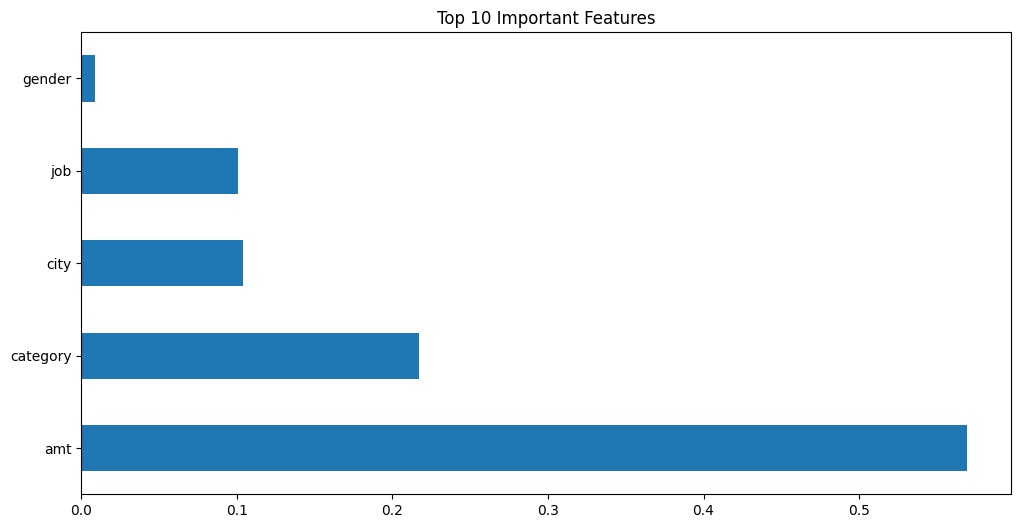

In [31]:
if hasattr(random_forest, 'feature_importances_'):
    plt.figure(figsize=(12, 6))
    feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.show()